<a href="https://colab.research.google.com/github/natalia973/Data-Science-Data-Analytics/blob/main/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('/content/laptop.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df["Price"] = df["Price"].replace({r"[₹,]": ""}, regex=True).astype(float)

In [ ]:
df['Ram_teste'] = df['Ram'].str.extract(r"(\d+)")

In [ ]:
df = df.rename(columns={"Ram_teste":"Ram_qtd"})

In [ ]:
def parse_ssd(ssd_str):
    if pd.isna(ssd_str):
        return 0
    if 'TB' in ssd_str:
        return float(re.search(r"(\d+)", ssd_str).group(1)) * 1024
    elif 'GB' in ssd_str:
        return float(re.search(r"(\d+)", ssd_str).group(1))
    return 0

In [ ]:
df['SSD_size'] = df['SSD'].apply(parse_ssd)

In [ ]:
df['Graphics_brand'] = df['Graphics'].str.extract(r"(NVIDIA|AMD|Intel)", expand=False)

In [ ]:
df['Processor_gen'] = df['Generation'].str.extract(r'(\d+)(?:st|nd|rd|th)')

In [ ]:
df["Display Size"] = df["Display"].str.extract(r"(\d{2}\.?\d*)").astype(float)

In [ ]:
top10_mais_caros = df.nlargest(10,'Price')
top10_mais_caros.head(2)

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_qtd,SSD_size,Graphics_brand,Processor_gen,Display Size
65,MSI Titan 18 HX Gaming Laptop (14th Gen Core i...,599990.0,NaN,14th Gen Intel Core i9 14900HX,32 GB DDR5 RAM,2 TB SSD,16 GB NVIDIA GeForce RTX 4090,Windows 11 OS,"18 inches, 3840 x 2400 pixels",2 Year Warranty,Backlit Keyboard,2,16.0,NaN,14,11.0
346,MSI CreatorPro X17 HX A13VKS-249IN Laptop (13t...,519990.0,NaN,13th Gen Intel Core i9 13980HX,"24 Cores (8P + 16E), 32 Threads",64 GB DDR5 RAM,4 TB SSD,"17 inches, 2560 x 1600 pixels",12 GB NVIDIA GeForce RTX 3500 Ada,Windows 11 OS,3 Year Warranty,64,4096.0,NVIDIA,13,17.0


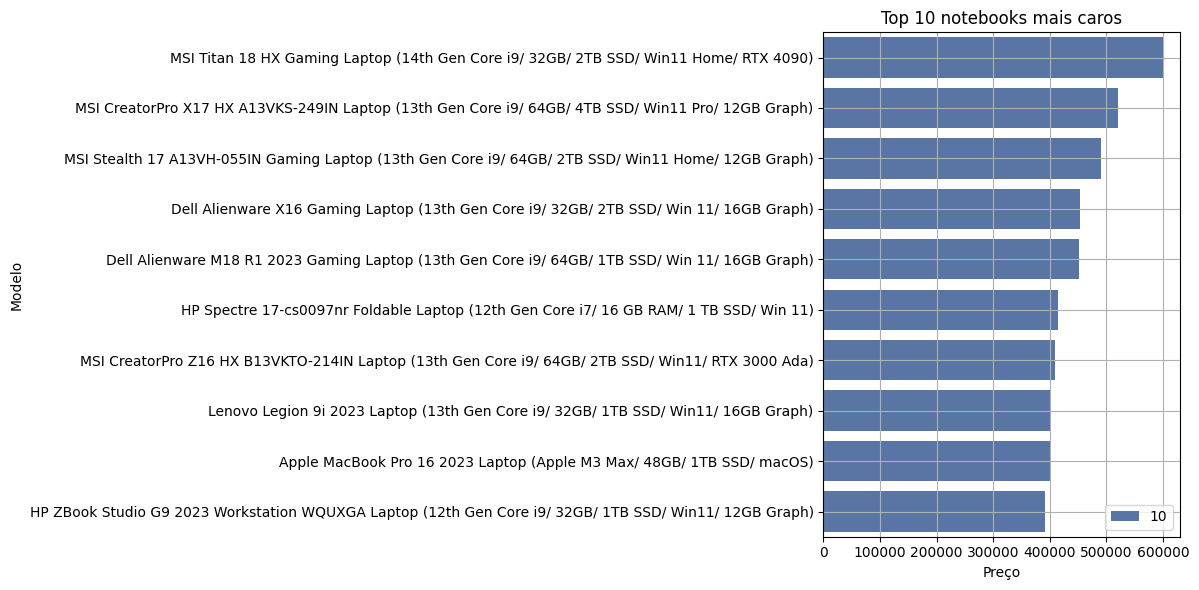

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Price',y='Model',data=top10_mais_caros,hue=10,palette="deep")
plt.title("Top 10 notebooks mais caros")
plt.xlabel("Preço")
plt.ylabel("Modelo")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
ssd_buckets = pd.cut(df['SSD_size'],bins=[0,256,512,1024,2048],labels=['<256','257-512','513-1TB','1TB>='])

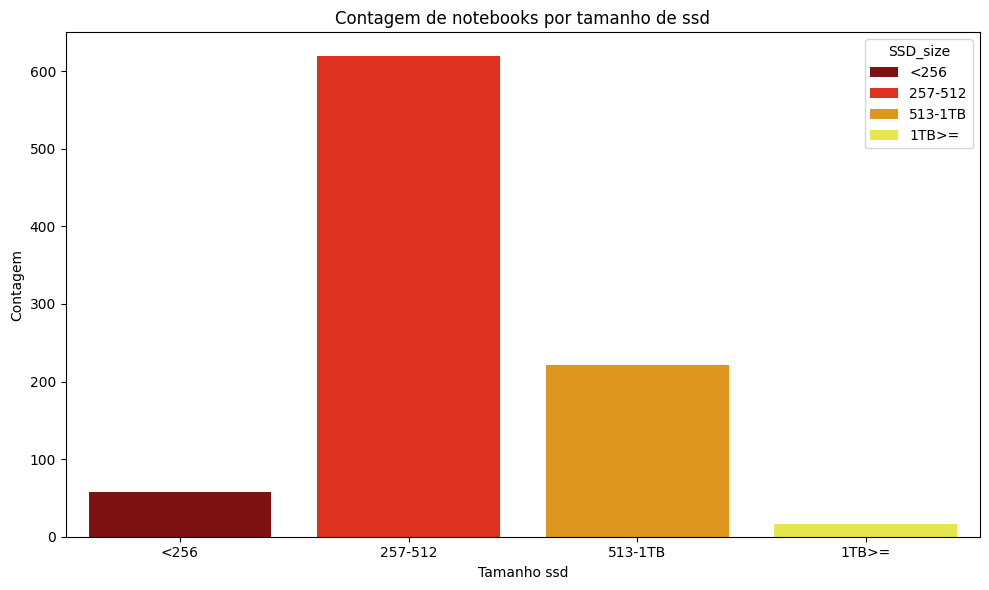

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=ssd_buckets,hue=ssd_buckets,palette="hot")
plt.title("Contagem de notebooks por tamanho de ssd")
plt.ylabel("Contagem")
plt.xlabel("Tamanho ssd")
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
corr = df[['Price','Ram_qtd','Processor_gen','SSD_size','Rating']]
corr = corr.corr()
corr

,Price,Ram_qtd,Processor_gen,SSD_size,Rating
Price,1.000000,0.177726,0.254244,0.624190,0.562655
Ram_qtd,0.177726,1.000000,0.081975,0.056176,0.125663
Processor_gen,0.254244,0.081975,1.000000,0.143592,-0.017378
SSD_size,0.624190,0.056176,0.143592,1.000000,0.406675
Rating,0.562655,0.125663,-0.017378,0.406675,1.000000


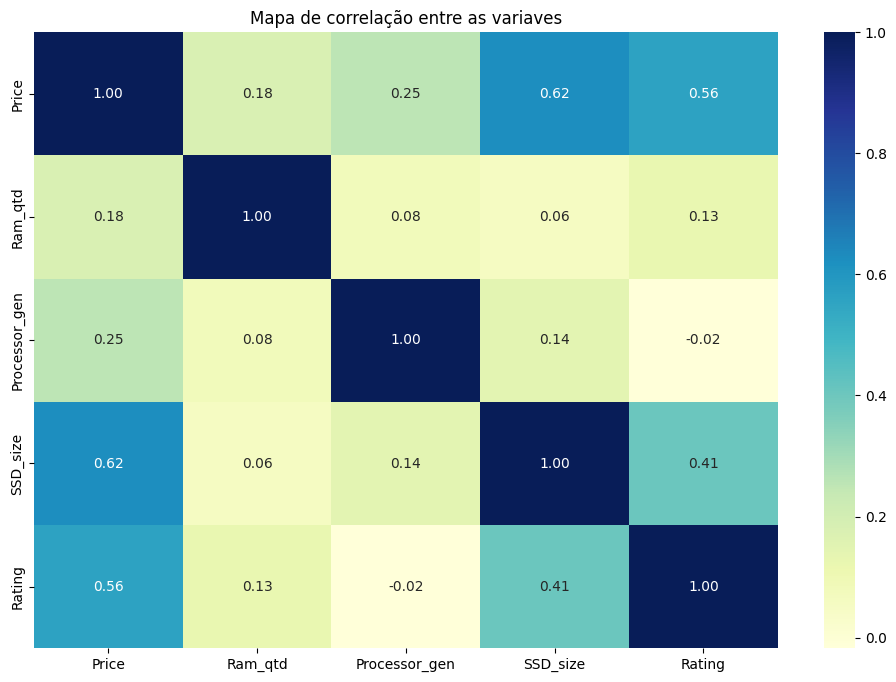

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="YlGnBu")
plt.title("Mapa de correlação entre as variaves")
plt.show()

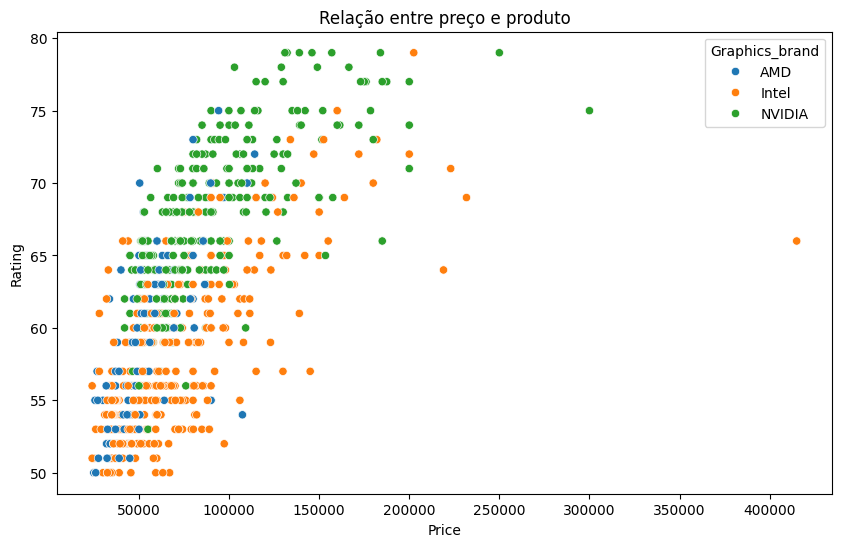

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x = 'Price' , y='Rating', hue = 'Graphics_brand')
plt.title('Relação entre preço e produto')
plt.show()

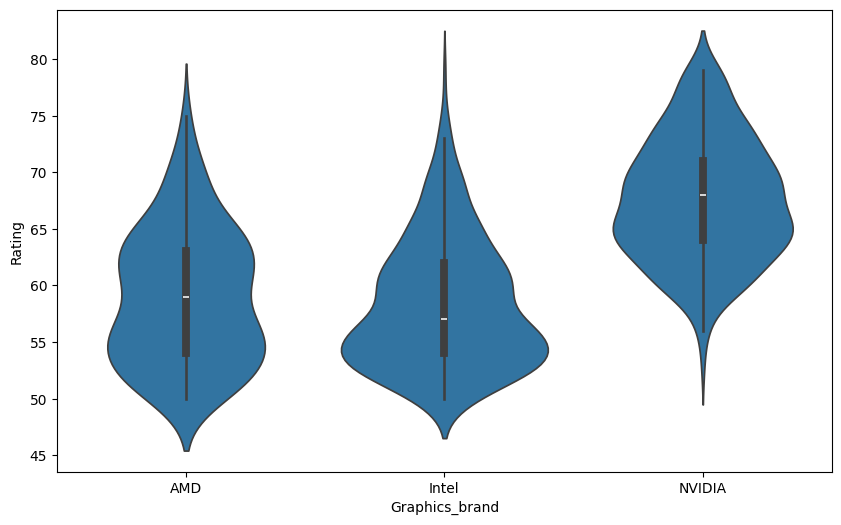

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Graphics_brand', y='Rating')
plt.show()

In [ ]:
amd_laptops = df[df['Model'].str.contains('AMD', na = False)]
amd_laptops.head(5)

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_qtd,SSD_size,Graphics_brand,Processor_gen,Display Size
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,50399.0,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,8,512.0,AMD,5,15.6
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,26989.0,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,8,512.0,AMD,7,15.6
9,HP Victus 15-fb1017AX Gaming Laptop (AMD Ryzen...,56490.0,69.0,7th Gen Amd Ryzen 5 7535HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,16,512.0,NVIDIA,7,15.6
13,HP Victus 16-s0094AX Gaming Laptop (AMD Ryzen ...,81990.0,73.0,7th Gen AMD Ryzen 7 7840HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 1920 x 1080 pixels",6 GB NVIDIA GeForce RTX 3050,Windows 11 OS,1 Year Warranty,16,1024.0,NVIDIA,7,16.1
16,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,26749.0,57.0,5th Gen AMD Ryzen 3 5300U,"Quad Core, 8 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,8,512.0,AMD,5,15.6


In [ ]:
intel_laptops=df[df['Model'].str.contains('Core', na = False)]
intel_laptops.head(2)

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_qtd,SSD_size,Graphics_brand,Processor_gen,Display Size
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,8,512.0,Intel,11,15.6
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,69990.0,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,16,512.0,Intel,12,13.3
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,102990.0,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,16,1024.0,NVIDIA,14,16.1
5,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,35990.0,55.0,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,8,512.0,Intel,12,15.6
7,Samsung Galaxy Book2 NP550XED-KA1IN 15 Laptop ...,42990.0,54.0,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Integrated UHD,Windows 11 OS,1 Year Warranty,8,512.0,Intel,12,15.6


In [ ]:
gen_rating=intel_laptops.groupby('Processor_gen')['Rating'].mean().reset_index()
gen_rating=gen_rating[gen_rating['Rating'].notnull()]
gen_rating

,Processor_gen,Rating
0,10,55.166667
1,11,59.365591
2,12,60.905473
3,13,62.388626
4,14,78.500000


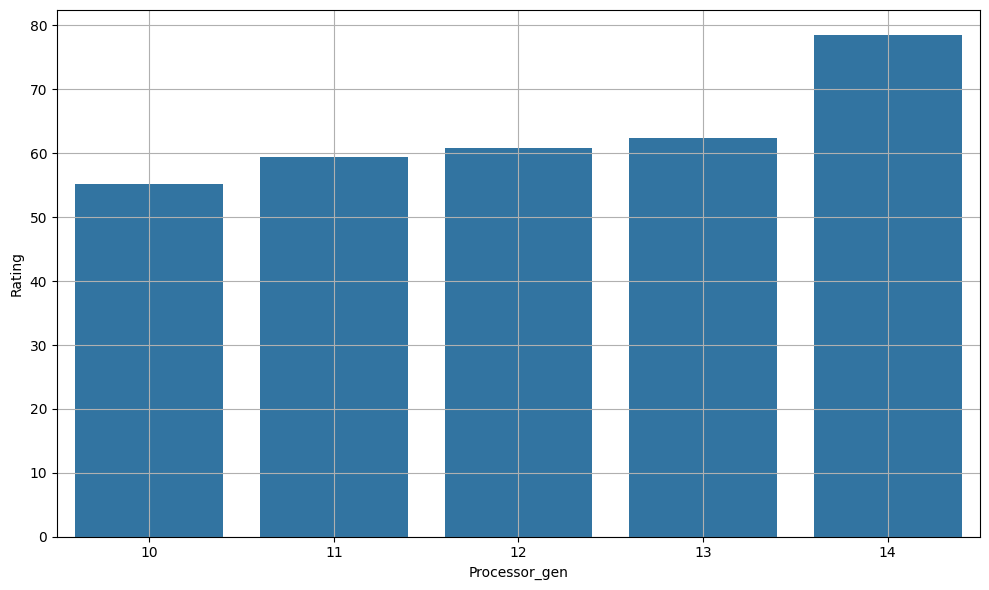

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Processor_gen', y = 'Rating', data=gen_rating)
plt.tight_layout()
plt.grid(True)